# Prototyping the data quality criteria

Ok, this is a take on Q2/Q1/Q0.



In [1]:
%run ../variability_selection.py

# This is the document in which I am (hopefully!) finalizing the criteria used to select reliable-quality variable brown dwarf candidates.

Here's the approach:

- we're applying **"quality"** cuts to identify which stars have sufficiently flag-free data in their photometry to qualify for automatic lightcurve analysis. (We may later revisit stars which technically fail these criteria but whose lightcurves can be validated on other, perhaps more subjective grounds.)
- we're applying **"variability"** cuts to identify which of ^ those stars have statistically significant variability. Because there are *so many* stars in these datasets, the "variability" criterion is still a little conservative, to avoid "surprise" data quality issues that are corner cases.
- we're applying **"color-magnitude"** cuts to identify which of ^ those stars have JHK colors consistent with a YSO with a mass below the hydrogen limit, with the age associated with the star-forming region in question, at the distance of that star-forming region, given the assumptions of a particular stellar evolution model. We allow for interstellar dust reddening. (Currently, I'm working from an email Johanna sent me from July 21, 2020; Ruby will help me fine-tune this.)

After the above steps are taken, we are able to select brown dwarf candidates in each data set, after which I generate maps and light curves. Those are the things we analyze.

In [2]:
spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in zip(wserv_ids, n_obs_list, n_min_list, n_max_list):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)

    print(f"NewER Q0 size: {np.sum(q0)}")
    print(f"NewER Q1 size: {np.sum(q1)}")
    print(f"NewER Q2 size: {np.sum(q2)}")
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    print(f"V0 size: {np.sum(v0)}")
    print(f"V1 size: {np.sum(v1)}")
    print(f"V2 size: {np.sum(v2)}")
    
    


   WSERV1: 

NewER Q0 size: 115858
NewER Q1 size: 66653
NewER Q2 size: 35246
V0 size: 3806
V1 size: 370
V2 size: 183

   WSERV5: 

NewER Q0 size: 15724
NewER Q1 size: 5375
NewER Q2 size: 3452
V0 size: 2871
V1 size: 557
V2 size: 315

   WSERV7: 

NewER Q0 size: 11885
NewER Q1 size: 6269
NewER Q2 size: 4756
V0 size: 326
V1 size: 96
V2 size: 61

   WSERV8: 

NewER Q0 size: 15021
NewER Q1 size: 8227
NewER Q2 size: 6253
V0 size: 377
V1 size: 91
V2 size: 61

   WSERV11: 

NewER Q0 size: 21530
NewER Q1 size: 13865
NewER Q2 size: 10533
V0 size: 736
V1 size: 317
V2 size: 222


In [3]:
sq0_variables

<function __main__.sq0_variables(*args, **kwargs)>

In [4]:
%run ../brown_dwarf_selection.py


   WSERV1: 

Q1 brown dwarf candidates: 24595
Q1 brown dwarf candidates that are variable: 109

   WSERV5: 

Q1 brown dwarf candidates: 3036
Q1 brown dwarf candidates that are variable: 192

   WSERV7: 

Q1 brown dwarf candidates: 4149
Q1 brown dwarf candidates that are variable: 47

   WSERV8: 

Q1 brown dwarf candidates: 5097
Q1 brown dwarf candidates that are variable: 26

   WSERV11: 

Q1 brown dwarf candidates: 5944
Q1 brown dwarf candidates that are variable: 8


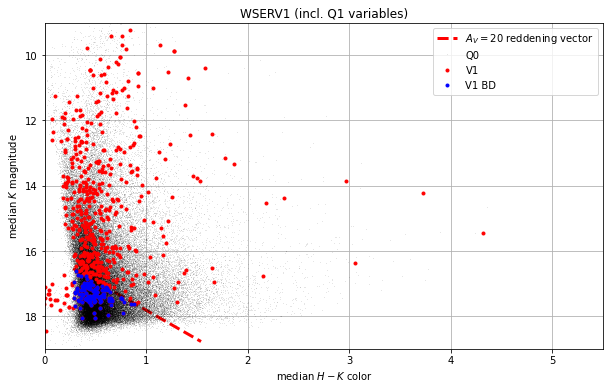

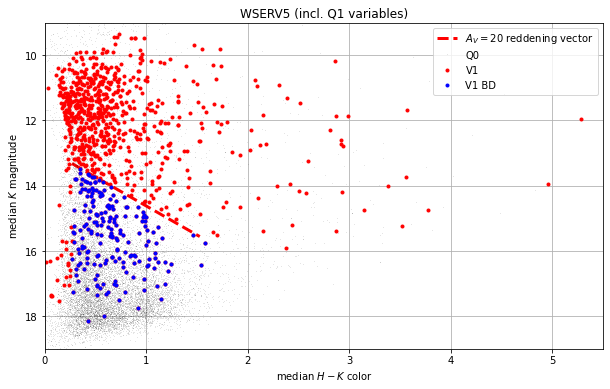

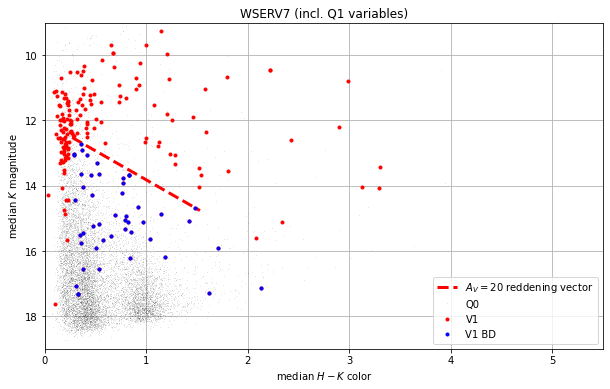

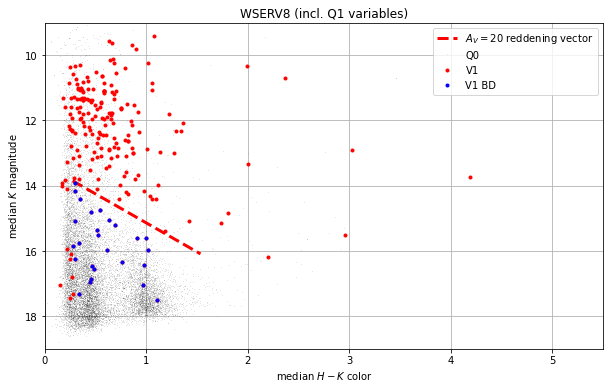

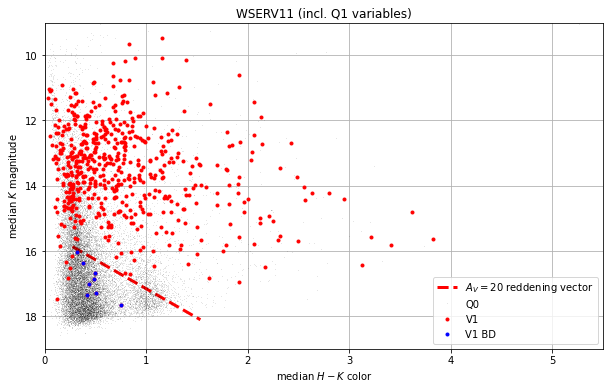

In [5]:
import matplotlib.pyplot as plt
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, ax = plt.subplots(1, figsize=(10,6))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

    ax.plot(
        [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*20],
        [K_BDlimit, K_BDlimit + A_K*20],
        'r--', lw=3,
        label='$A_V=20$ reddening vector'
    )
    ax.plot(hmk[q0], k[q0], 'k,', alpha=0.1, label='Q0')
    ax.plot(hmk[v1], k[v1], 'r.', alpha=1, label='V1')
    ax.plot(hmk[v1&bd], k[v1&bd], 'b.', alpha=1, label='V1 BD')
    
    print(f"Q1 brown dwarf candidates: {np.sum(q1&bd)}")
    print(f"Q1 brown dwarf candidates that are variable: {np.sum(v1&bd)}")
    ax.legend()
    ax.grid(True)
    
    ax.set_xlabel("median $H-K$ color")
    ax.set_ylabel("median $K$ magnitude")
    ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")

    ax.set_xlim(0, 5.5)
    ax.set_ylim(19, 9)
    


   WSERV1: 


   WSERV5: 


   WSERV7: 


   WSERV8: 


   WSERV11: 



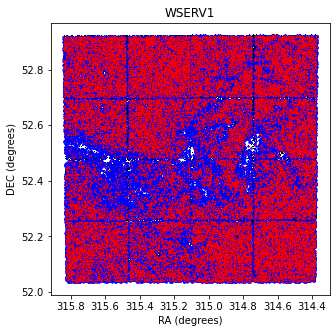

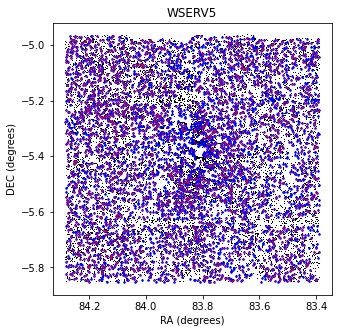

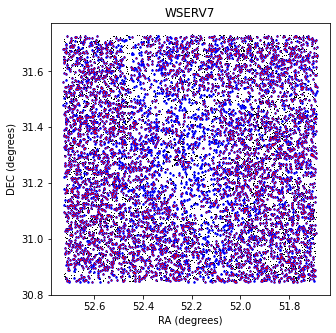

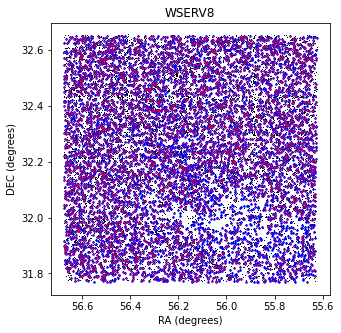

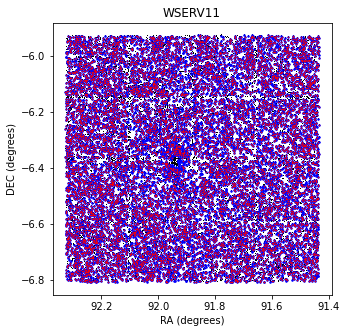

In [6]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    plt.figure(figsize=(5,5))
    plt.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,')
    plt.plot(np.degrees(ds[q1]['mean']['RA']), np.degrees(ds[q1]['mean']['DEC']), 'b.', ms=3)
    plt.plot(np.degrees(ds[q2]['mean']['RA']), np.degrees(ds[q2]['mean']['DEC']), 'r.', ms=1)    
    
    ax = plt.gca()

    ax.invert_xaxis()
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv}")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)


   WSERV1: 


   WSERV5: 


   WSERV7: 


   WSERV8: 


   WSERV11: 



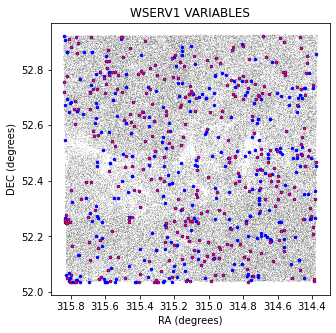

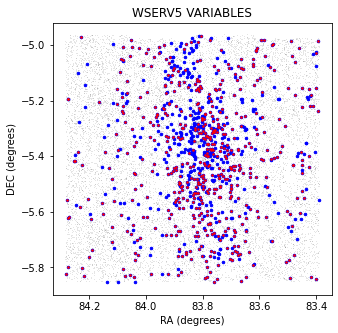

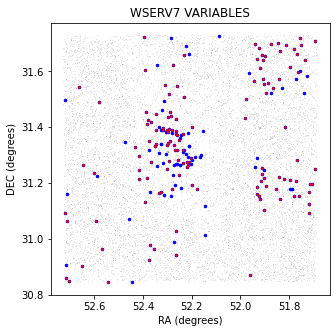

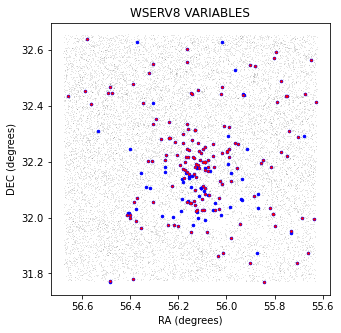

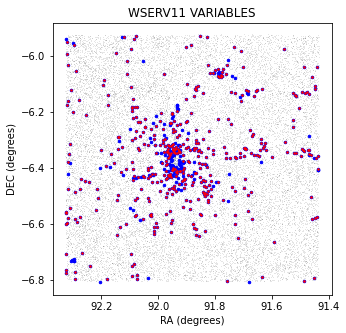

In [7]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    var = ds['variability']['Stetson_JHK'] > 2
    
    plt.figure(figsize=(5,5))
    plt.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
    plt.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'b.', ms=5)
    plt.plot(np.degrees(ds[v2]['mean']['RA']), np.degrees(ds[v2]['mean']['DEC']), 'r.', ms=3)    
    
    ax = plt.gca()

    ax.invert_xaxis()
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} VARIABLES")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)


   WSERV1: 


   WSERV5: 


   WSERV7: 


   WSERV8: 


   WSERV11: 



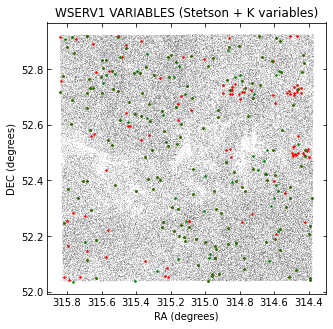

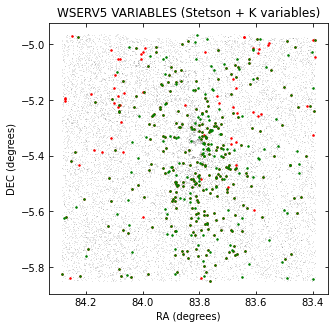

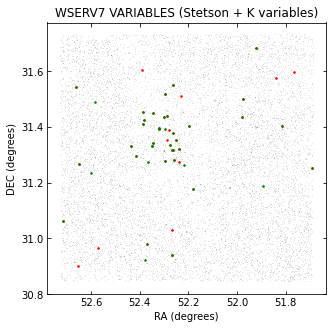

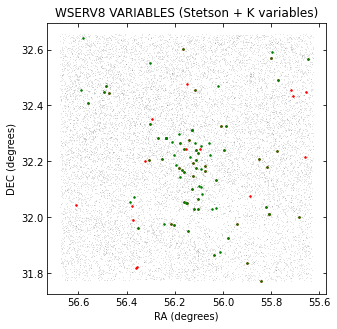

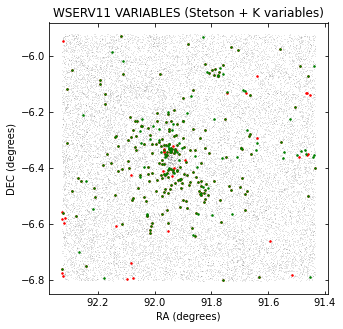

In [20]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    var = ds['variability']['Stetson_JHK'] > 2
    var_k = ds['variability']['K_red_chisq'] > 2
    var_h = ds['variability']['H_red_chisq'] > 2
    var_j = ds['variability']['J_red_chisq'] > 2
    
    plt.figure(figsize=(5,5))
    plt.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
#     plt.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'b.', ms=5)
    plt.plot(np.degrees(ds[q2 & var_k]['mean']['RA']), np.degrees(ds[q2 & var_k]['mean']['DEC']), 'r.', ms=3)    
    plt.plot(np.degrees(ds[q2 & var]['mean']['RA']), np.degrees(ds[q2 & var]['mean']['DEC']), 'g.', ms=3)    
#     plt.plot(np.degrees(ds[q2 & var]['mean']['RA']), np.degrees(ds[q2 & var]['mean']['DEC']), 'y.', ms=3)    
    
    ax = plt.gca()

    ax.invert_xaxis()
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} VARIABLES (Stetson + K variables)")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)


   WSERV1: 


   WSERV5: 


   WSERV7: 


   WSERV8: 


   WSERV11: 



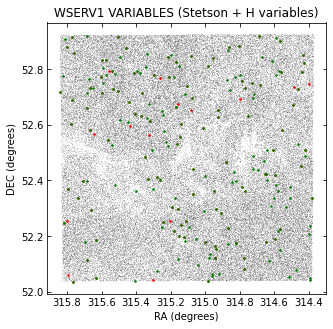

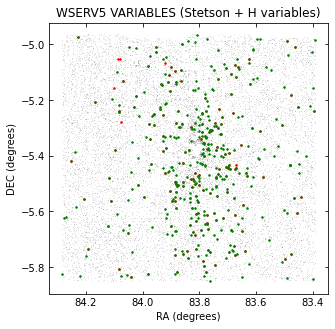

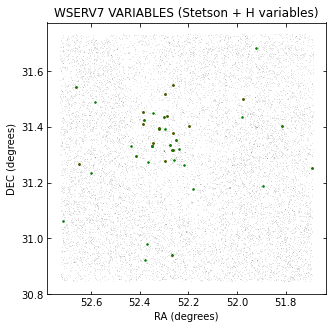

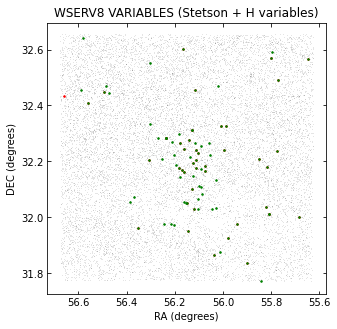

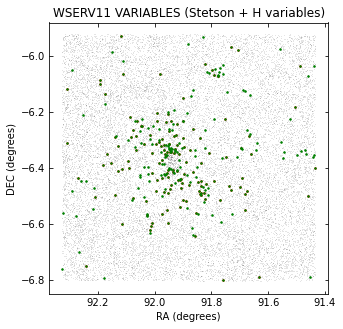

In [23]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    var = ds['variability']['Stetson_JHK'] > 2
    var_k = ds['variability']['K_red_chisq'] > 5
    var_h = ds['variability']['H_red_chisq'] > 5
    var_j = ds['variability']['J_red_chisq'] > 5
    
    plt.figure(figsize=(5,5))
    plt.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
#     plt.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'b.', ms=5)
    plt.plot(np.degrees(ds[q2 & var_h]['mean']['RA']), np.degrees(ds[q2 & var_h]['mean']['DEC']), 'r.', ms=3)    
    plt.plot(np.degrees(ds[q2 & var]['mean']['RA']), np.degrees(ds[q2 & var]['mean']['DEC']), 'g.', ms=3)    
#     plt.plot(np.degrees(ds[q2 & var]['mean']['RA']), np.degrees(ds[q2 & var]['mean']['DEC']), 'y.', ms=3)    
    
    ax = plt.gca()

    ax.invert_xaxis()
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} VARIABLES (Stetson + H variables)")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)


   WSERV1: 


   WSERV5: 


   WSERV7: 


   WSERV8: 


   WSERV11: 



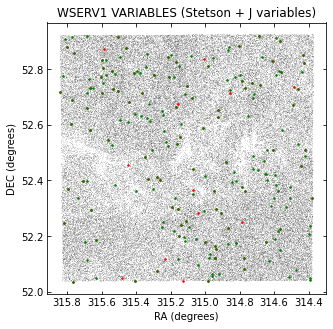

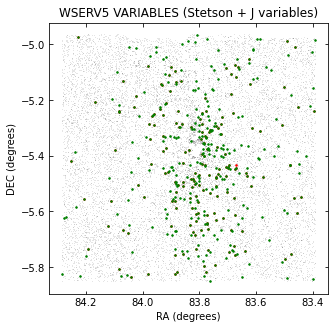

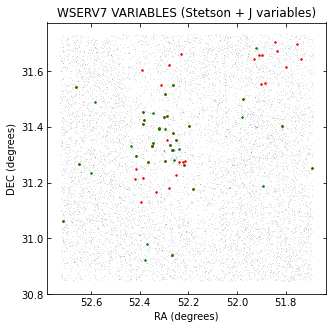

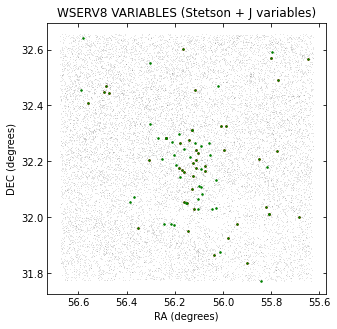

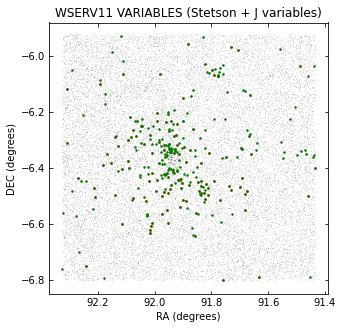

In [21]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    var = ds['variability']['Stetson_JHK'] > 2
    var_k = ds['variability']['K_red_chisq'] > 5
    var_h = ds['variability']['H_red_chisq'] > 5
    var_j = ds['variability']['J_red_chisq'] > 5
    
    plt.figure(figsize=(5,5))
    plt.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
#     plt.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'b.', ms=5)
    plt.plot(np.degrees(ds[q2 & var_j]['mean']['RA']), np.degrees(ds[q2 & var_j]['mean']['DEC']), 'r.', ms=3)    
    plt.plot(np.degrees(ds[q2 & var]['mean']['RA']), np.degrees(ds[q2 & var]['mean']['DEC']), 'g.', ms=3)    
#     plt.plot(np.degrees(ds[q2 & var]['mean']['RA']), np.degrees(ds[q2 & var]['mean']['DEC']), 'y.', ms=3)    
    
    ax = plt.gca()

    ax.invert_xaxis()
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} VARIABLES (Stetson + J variables)")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)


   WSERV1: 

Q1 brown dwarf candidates: 24595
Q1 brown dwarf candidates that are variable: 109

   WSERV5: 

Q1 brown dwarf candidates: 3036
Q1 brown dwarf candidates that are variable: 192

   WSERV7: 

Q1 brown dwarf candidates: 4149
Q1 brown dwarf candidates that are variable: 47

   WSERV8: 

Q1 brown dwarf candidates: 5097
Q1 brown dwarf candidates that are variable: 26

   WSERV11: 

Q1 brown dwarf candidates: 5944
Q1 brown dwarf candidates that are variable: 8


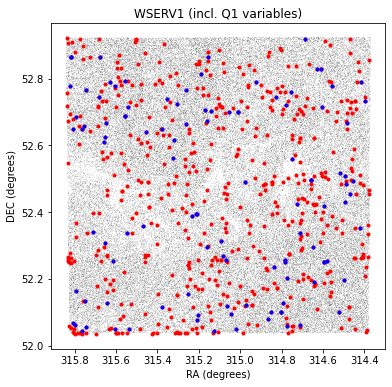

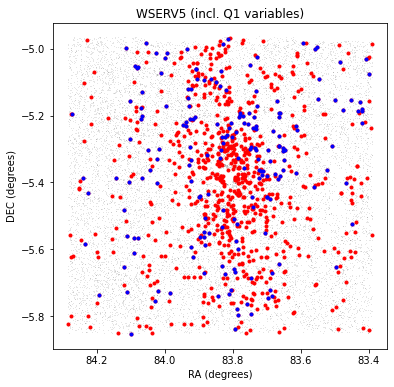

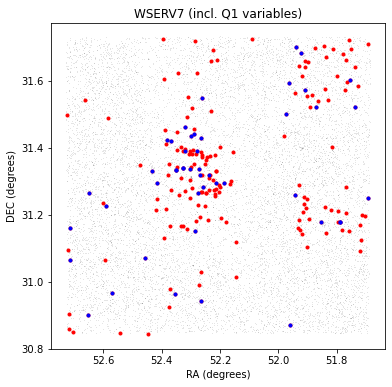

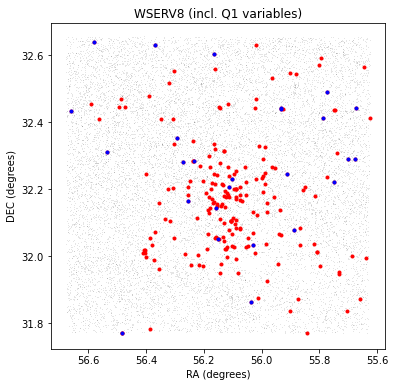

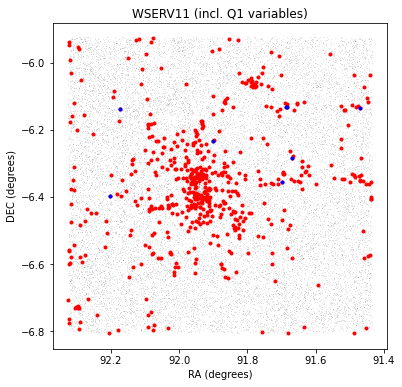

In [11]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, ax = plt.subplots(1, figsize=(6,6))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

#     ax.plot(
#         [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*20],
#         [K_BDlimit, K_BDlimit + A_K*20],
#         'r--', lw=3,
#         label='$A_V=20$ reddening vector'
#     )
#     ax.plot(hmk[q0], k[q0], 'k,', alpha=0.1, label='Q0')
#     ax.plot(hmk[v1], k[v1], 'r,', alpha=1, label='V1')
#     ax.plot(hmk[v1&bd], k[v1&bd], 'b,', alpha=1, label='V1 BD')
    
    ax.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
    ax.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'r.', alpha=1, zorder=5)
    ax.plot(np.degrees(ds[v1&bd]['mean']['RA']), np.degrees(ds[v1&bd]['mean']['DEC']), 'b.', alpha=1, zorder=10)

    print(f"Q1 brown dwarf candidates: {np.sum(q1&bd)}")
    print(f"Q1 brown dwarf candidates that are variable: {np.sum(v1&bd)}")
#     ax.legend()
#     ax.grid(True)
    
    ax.invert_xaxis()
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)

# An activity: bisecting to find the real cutoff

I'm going to do a bisection activity. I have a theory: the weird spatially correlated artifacts are arising because below a certain brightness cutoff, the data become unreliable. I want to find the place where that happens.

## First attempt: cuts at K=17ish
This was a failure.

## Second attempt: separate things by band.
This also has not advanced our cause.

In [12]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    break
    
    print(f"\n\n\n\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    q1_j = sq1_j(ds, n_min, n_max)
    q1_h = sq1_h(ds, n_min, n_max)
    q1_k = sq1_k(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(6*2, 6*3))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

#     left = h < 16
#     right = h >= 16
        
    bands = ["J", "H", "K"]
    
    limits = {"J" : 15, "H": 15, "K": 15}
    v_functions = {"J" : sv_j, "H": sv_h, "K": sv_k}
    q_by_band = {"J" : q1_j, "H": q1_h, "K": q1_k}
    
    for axpair, band in zip(axes, bands):
        
        left = ds['median'][f'{band}APERMAG3'] < limits[band]
        right = ds['median'][f'{band}APERMAG3'] >= limits[band]
        
        sides = (left, right)
        
        for ax, side in zip(axpair, sides):
            
            v_b = v_functions[band](ds) & q_by_band[band]
            
            print(np.sum(v_b))
            print(np.sum(v1))
    
            ax.plot(np.degrees(ds[side&q0]['mean']['RA']), np.degrees(ds[side&q0]['mean']['DEC']), 'k,', alpha=0.1)
            ax.plot(np.degrees(ds[side&v_b]['mean']['RA']), np.degrees(ds[side&v_b]['mean']['DEC']), 'r.', alpha=1, zorder=5)
            ax.plot(np.degrees(ds[side&v_b&bd]['mean']['RA']), np.degrees(ds[side&v_b&bd]['mean']['DEC']), 'b.', alpha=1, zorder=10)

#             print(f"Q1 brown dwarf candidates: {np.sum(side&q1&bd)}")
#             print(f"Q1 brown dwarf candidates that are variable: {np.sum(side&v1&bd)}")
        #     ax.legend()
        #     ax.grid(True)

            ax.set_xlabel("RA (degrees)")
            ax.set_ylabel("DEC (degrees)")
#             ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")
            ax.set_title(f"WSERV{wserv}: {band}")
    
        

    #     ax.set_xlim(0, 5.5)
    #     ax.set_ylim(19, 9)






   WSERV1: 





   WSERV5: 





   WSERV7: 





   WSERV8: 





   WSERV11: 



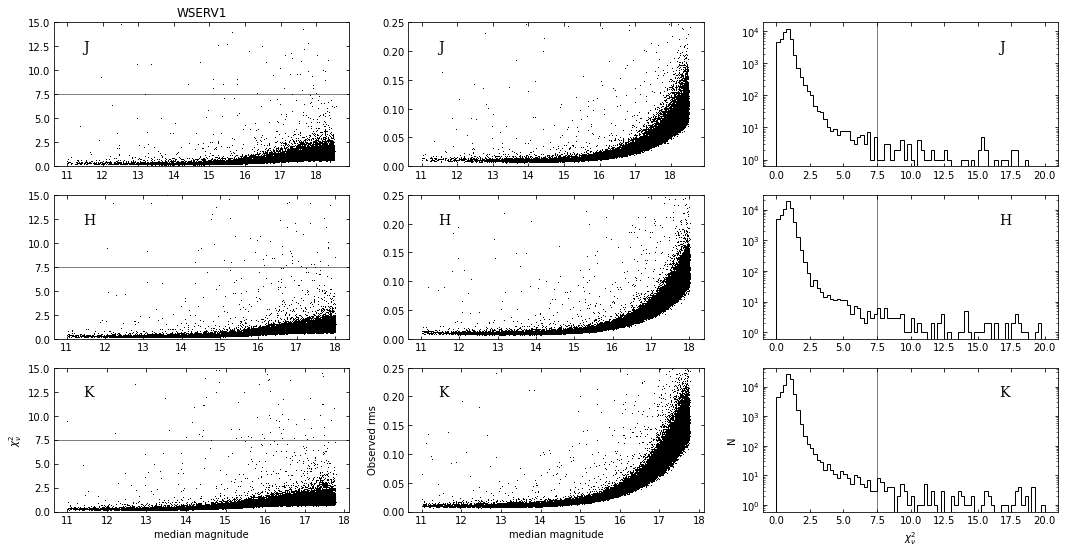

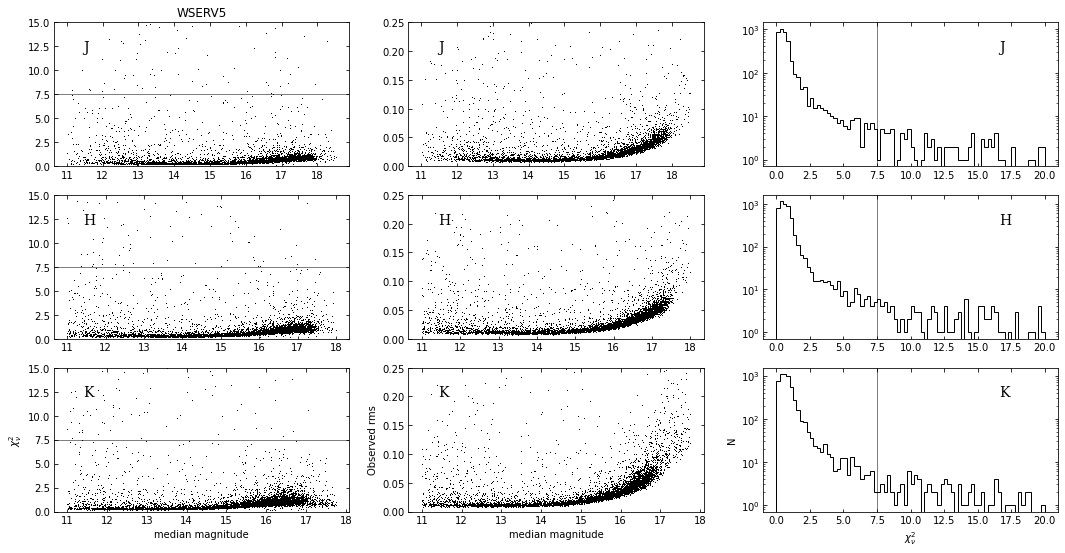

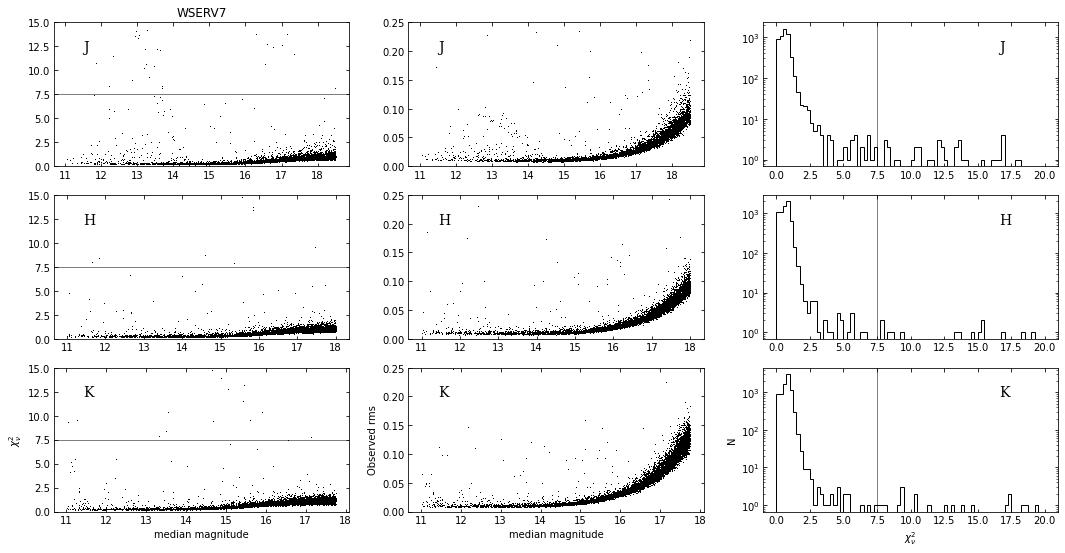

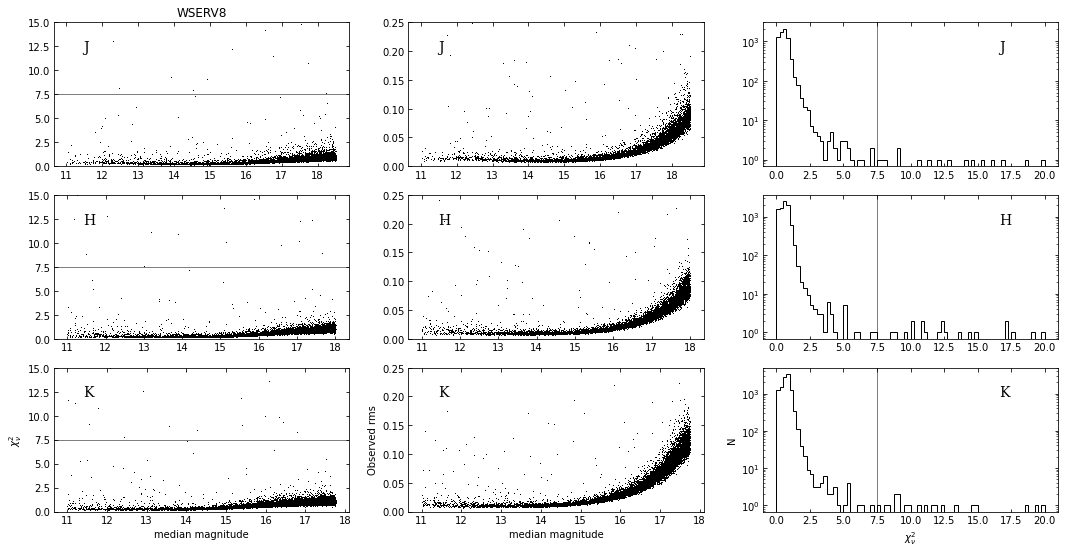

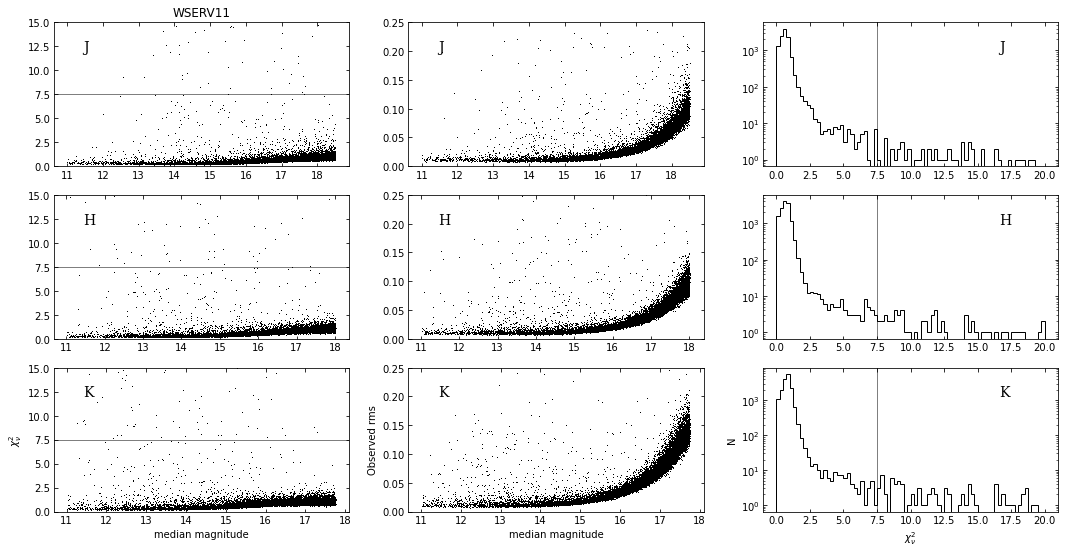

In [18]:
# Thing we need to do:

# plot chisq vs mag, sigma vs mag, and a histogram of chisq values (log y axis)

# maps

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n\n\n\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    q1_j = sq1_j(ds, n_min, n_max)
    q1_h = sq1_h(ds, n_min, n_max)
    q1_k = sq1_k(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(3*6, 6*3/2))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

        
    bands = ["J", "H", "K"]
    q_by_band = {"J" : q1_j, "H": q1_h, "K": q1_k}
    
    axes[0][0].set_title(f"WSERV{wserv}")
        
    for ax, band in zip(axes, bands):
 
        qb = q_by_band[band]
        ax[0].plot(ds[qb]['median'][f'{band}APERMAG3'], ds[qb]['variability'][f'{band}_red_chisq'], 'k,')
        ax[1].plot(ds[qb]['median'][f'{band}APERMAG3'], ds[qb]['std'][f'{band}APERMAG3'], 'k,')
        
        ax[2].set_yscale('log')
        ax[2].hist(ds[qb]['variability'][f'{band}_red_chisq'], bins=80, range=(0,20), color='k', histtype='step')
        

        ax[0].set_ylim(0, 15)
        ax[1].set_ylim(0, 0.25)
        
        ax[0].text(0.1, 0.8, f"{band}", fontsize=14, family='serif', transform=ax[0].transAxes)
        ax[1].text(0.1, 0.8, f"{band}", fontsize=14, family='serif', transform=ax[1].transAxes)
        ax[2].text(0.8, 0.8, f"{band}", fontsize=14, family='serif', transform=ax[2].transAxes)
        
        ax[0].axhline(7.5, color='k', lw=1, alpha=0.5)
        ax[2].axvline(7.5, color='k', lw=1, alpha=0.5)
        

    ax[0].set_ylabel(r"$\chi^2_\nu$")
    ax[0].set_xlabel("median magnitude")

    ax[1].set_ylabel("Observed rms")
    ax[1].set_xlabel("median magnitude")

    ax[2].set_ylabel("N")
    ax[2].set_xlabel(r"$\chi^2_\nu$")


        






   WSERV1: 





   WSERV5: 





   WSERV7: 





   WSERV8: 





   WSERV11: 



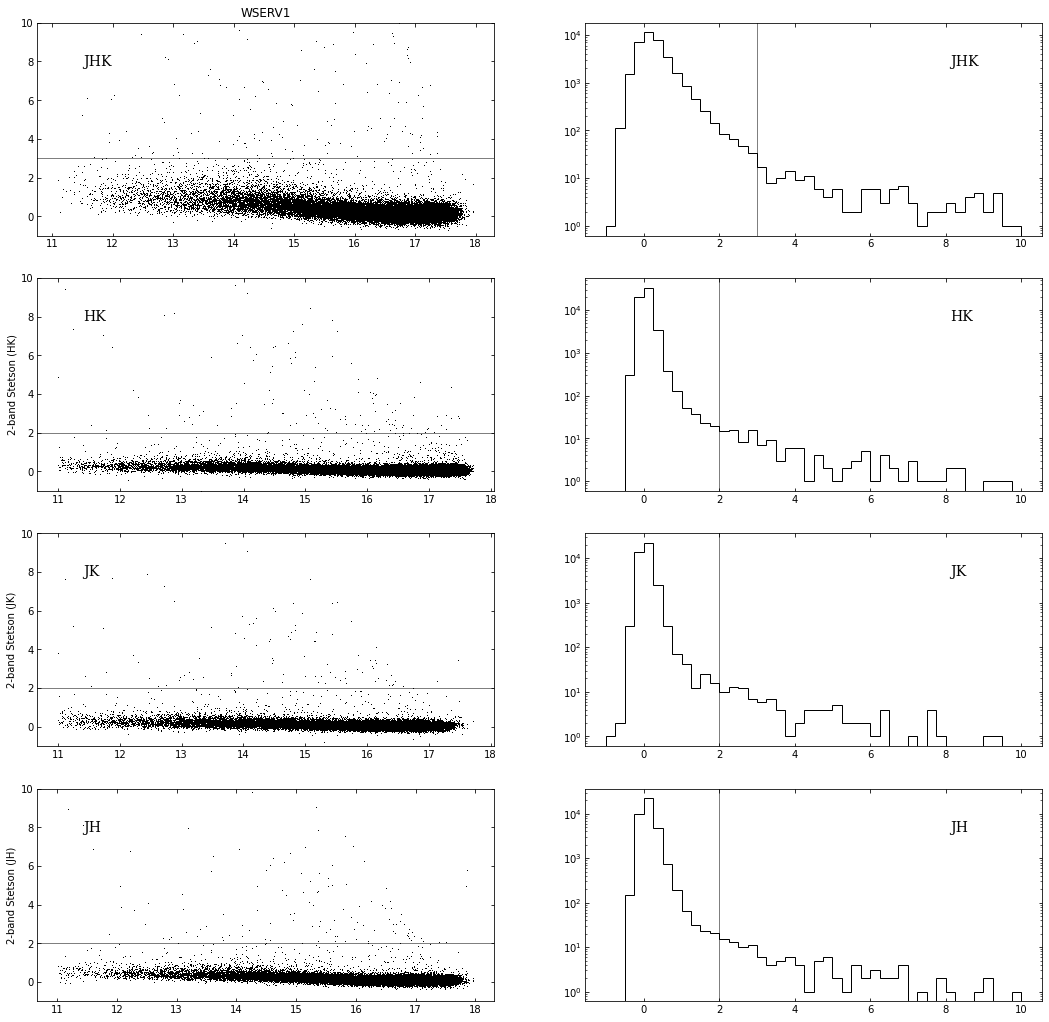

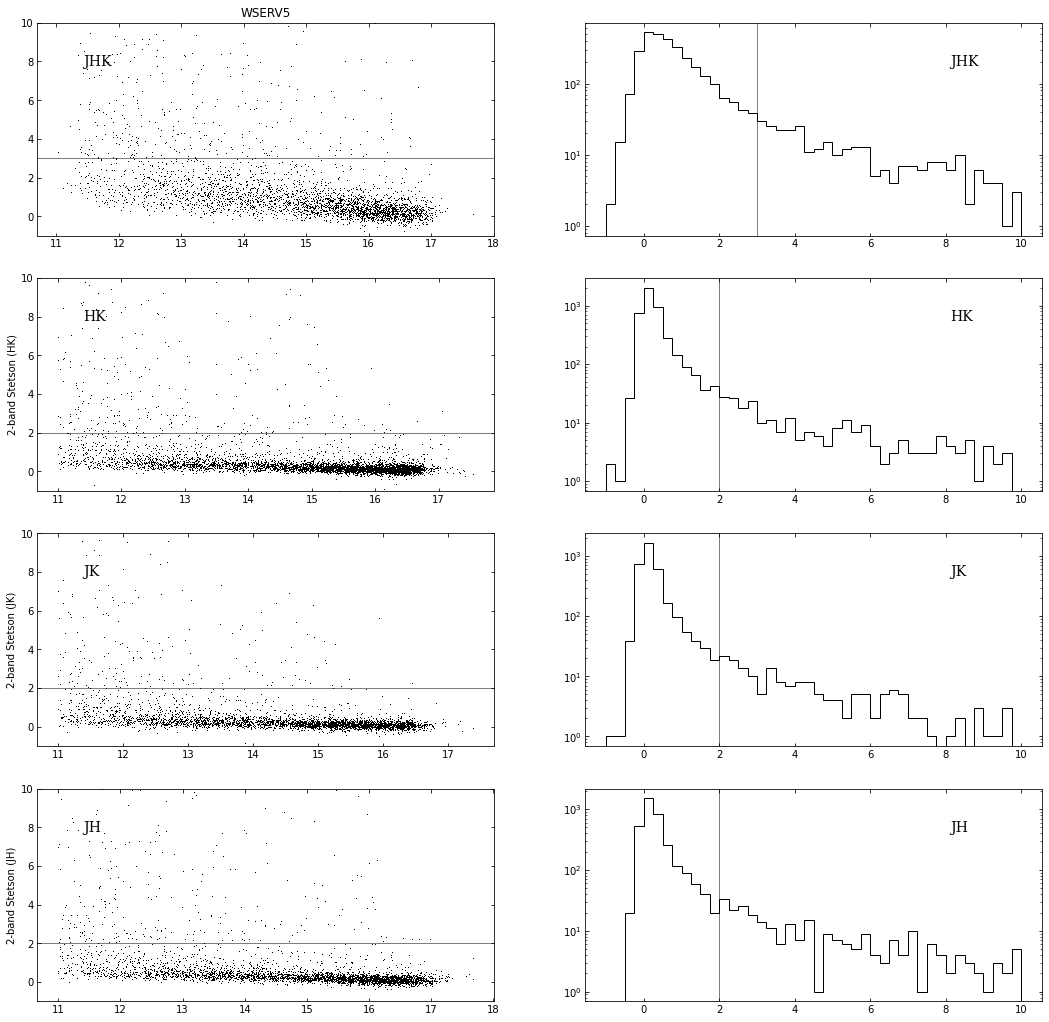

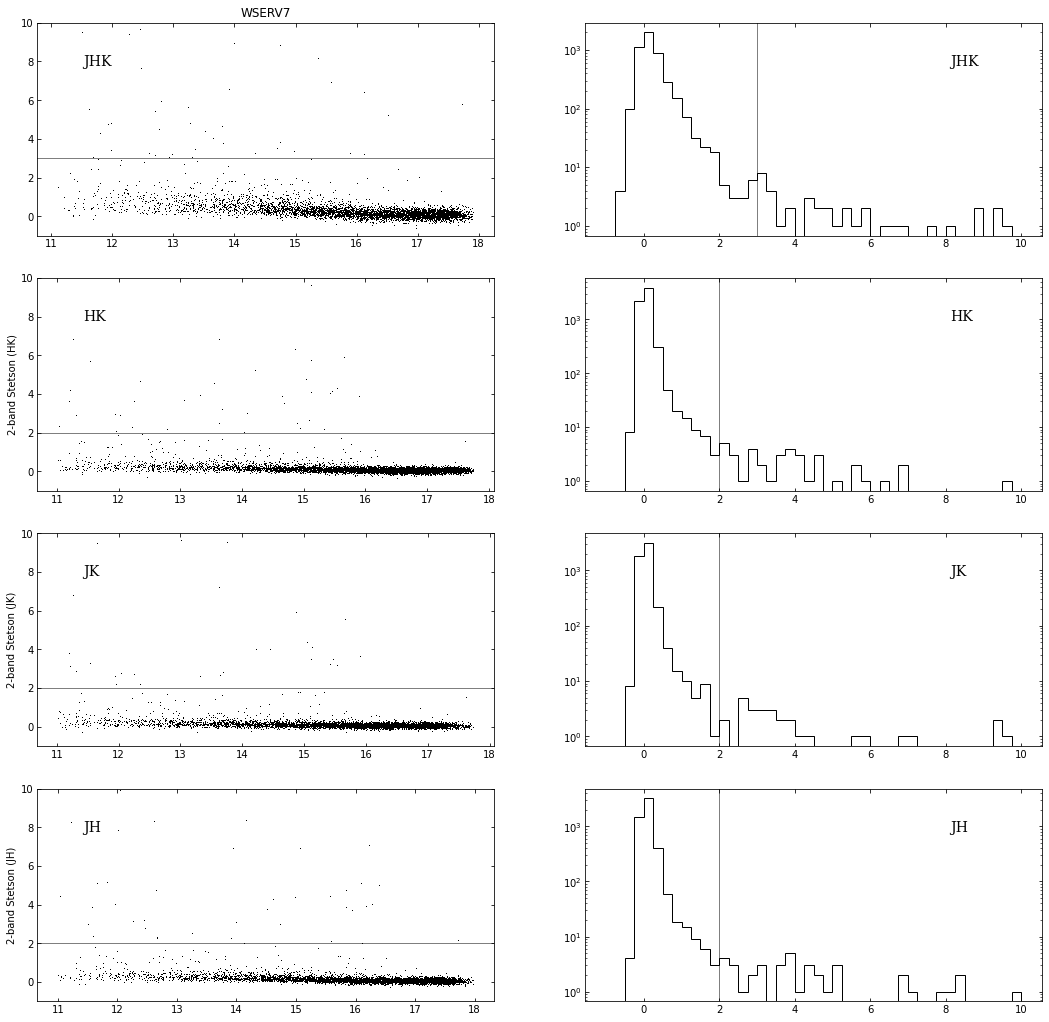

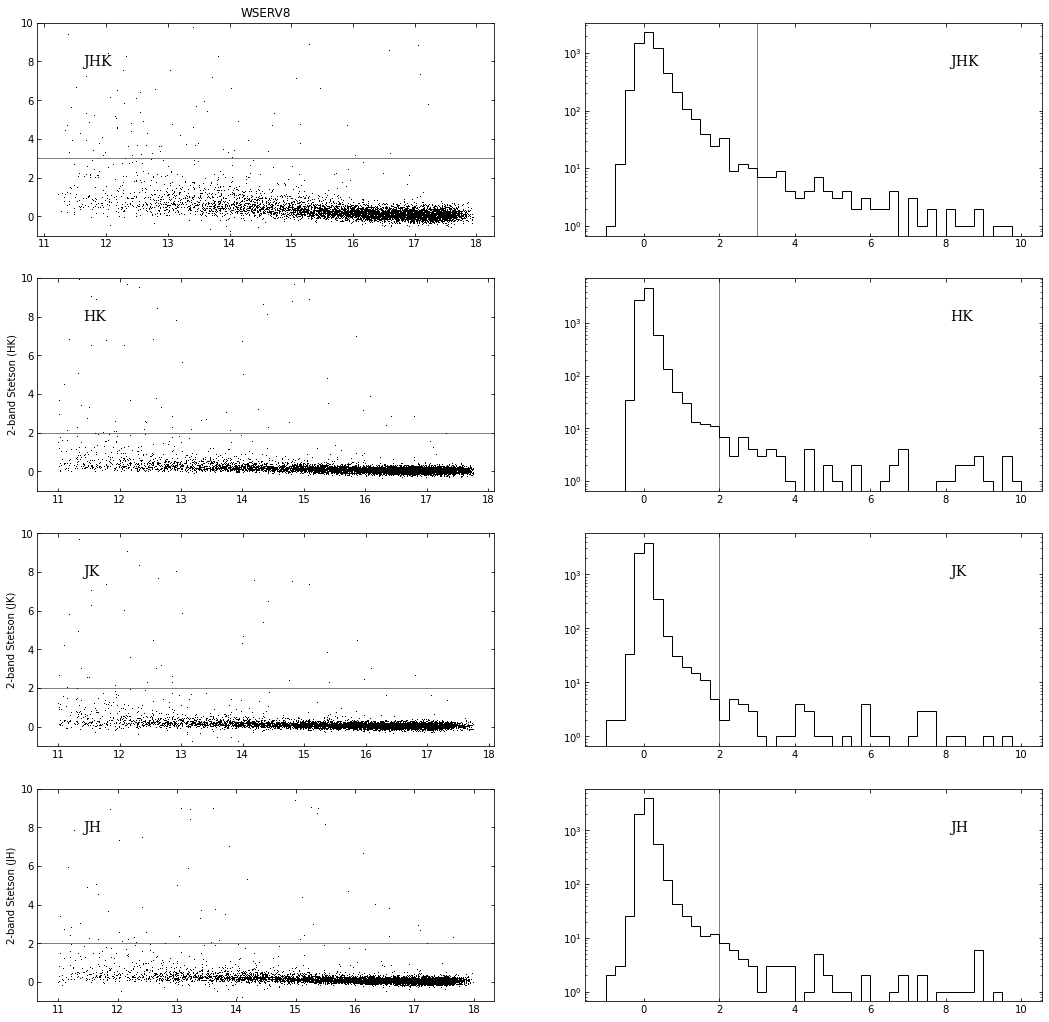

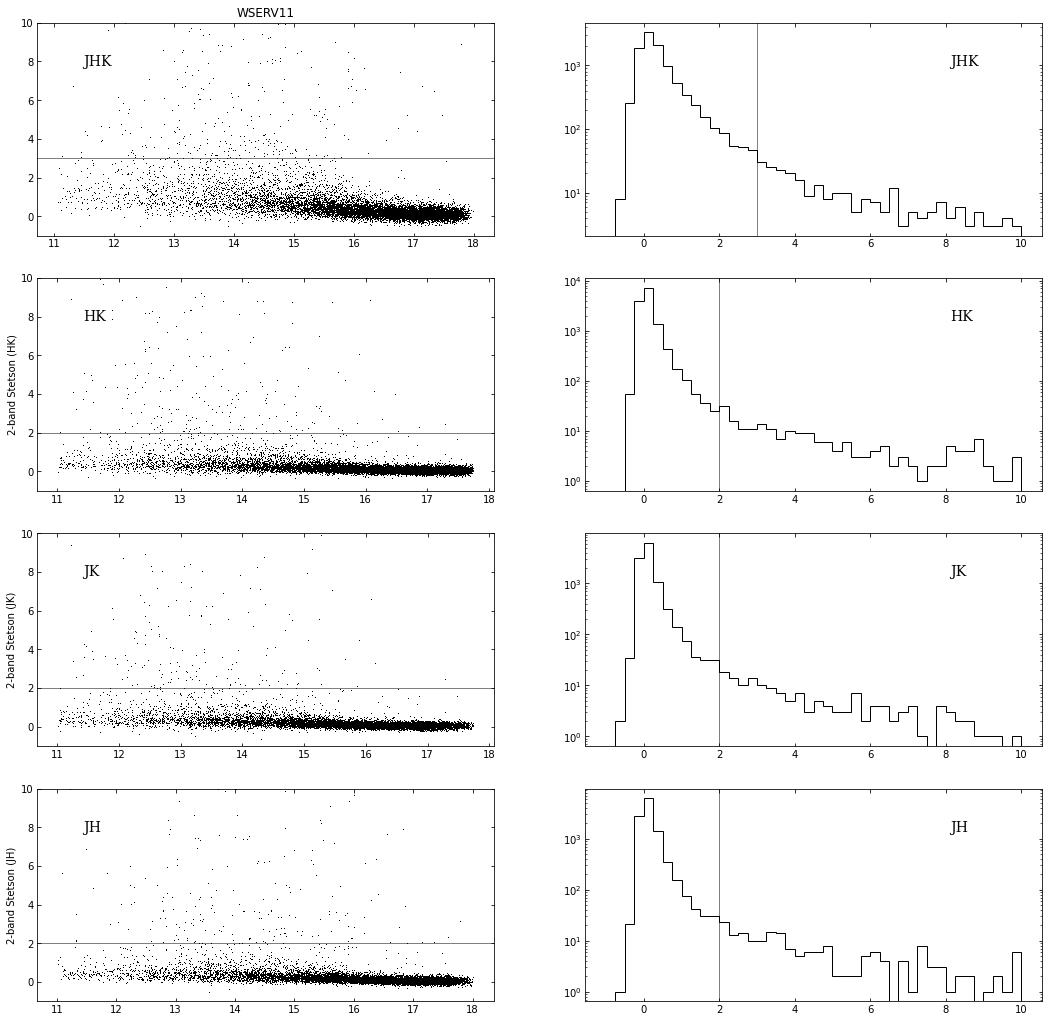

In [14]:
# Thing we need to do:

# plot chisq vs mag, sigma vs mag, and a histogram of chisq values (log y axis)

# maps

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n\n\n\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    q1_j = sq1_j(ds, n_min, n_max)
    q1_h = sq1_h(ds, n_min, n_max)
    q1_k = sq1_k(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(3*6, 6*3))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

        
    bands = ["J", "H", "K"]
    q_by_band = {"J" : q1_j, "H": q1_h, "K": q1_k}
    q_by_band_excluded = {"J" : q1_h & q1_k, "H": q1_j & q1_k, "K": q1_j & q1_h}
    
    axes[0][0].set_title(f"WSERV{wserv}")
    
    axes[0][0].plot(ds[q2]['median']['HAPERMAG3'], ds[q2]['variability']['Stetson_JHK'], 'k,')
    axes[0][1].set_yscale('log')
    axes[0][1].hist(ds[q2]['variability']['Stetson_JHK'], range=[-1,10], bins=44,  color='k', histtype='step')
    
    axes[0][0].set_ylim(-1, 10)
    
    axes[0][0].text(0.1, 0.8, f"JHK", fontsize=14, family='serif', transform=axes[0][0].transAxes)
    axes[0][1].text(0.8, 0.8, f"JHK", fontsize=14, family='serif', transform=axes[0][1].transAxes)

    axes[0][0].axhline(3, color='k', lw=1, alpha=0.5)
    axes[0][1].axvline(3, color='k', lw=1, alpha=0.5)

    for ax, band in zip(axes[1:], bands):
        
        
        band_pair = "JHK".replace(band, '')
         
        qb = q_by_band_excluded[band]
        ax[0].plot(ds[qb]['median'][f'{band_pair[-1]}APERMAG3'], ds[qb]['variability'][f'Stetson_{band_pair}'], 'k,')
#         ax[1].plot(ds[qb]['median'][f'{band_pair[-1]}APERMAG3'], ds[qb]['std'][f'{band_pair}APERMAG3'], 'k,')
        
        ax[1].set_yscale('log')
        ax[1].hist(ds[qb]['variability'][f'Stetson_{band_pair}'], range=[-1,10], bins=44,  color='k', histtype='step')
        

        ax[0].set_ylim(-1, 10)
#         ax[1].set_ylim(0, 0.25)
        
        ax[0].text(0.1, 0.8, f"{band_pair}", fontsize=14, family='serif', transform=ax[0].transAxes)
        ax[1].text(0.8, 0.8, f"{band_pair}", fontsize=14, family='serif', transform=ax[1].transAxes)
        
        ax[0].axhline(2, color='k', lw=1, alpha=0.5)
        ax[1].axvline(2, color='k', lw=1, alpha=0.5)
        

        ax[0].set_ylabel(f"2-band Stetson ({band_pair})")
#         ax[0].set_xlabel(f"median magnitude")

#     ax[1].set_ylabel("Observed rms")
#     ax[1].set_xlabel("median magnitude")

#     ax[2].set_ylabel("N")
#     ax[2].set_xlabel(r"$\chi^2_\nu$")

    

In [15]:
# let's try something.


## Below here are lightcurves of variable brown dwarf candidates from NGC1333, IC 348, and Mon R2. There are ~50 light curves here.

In [16]:
# %run ../brown_dwarf_selection.py
# %run ../variability_selection.py

# import astropy.table
# import pandas as pd
# from wuvars.plotting.lightcurve import simple_lc
# from wuvars.analysis.variability_selection import data_nuller

# import matplotlib.pyplot as plt
# from wuvars.analysis.bd_mags import apparent_BD_mags_jhk

# data_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/"
# spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
# wserv_ids = [1, 5, 7, 8, 11]
# n_obs_list = [130, 120, 171, 85, 110]

# n_min_list = [60, 35, 80, 55, 65]
# n_max_list = [100, 90, 160, 80, 100]

# for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list))[::-1]:
    
        
#     print(f"\n   WSERV{wserv}: \n")

#     spreadsheet_path = os.path.join(
#         spreadsheet_root,
#         f"wserv{str(wserv)}",
#         f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
#     )
    
#     ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     data_path = os.path.join(
#         data_root,
#         f"wserv{str(wserv)}",
#         f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected.fits",
#     )
    
#     dat = astropy.table.Table.read(data_path)
#     df = dat.to_pandas()
#     data_nuller(df)
#     dat_again = astropy.table.Table.from_pandas(df)
#     dat_by_source = dat_again.group_by("SOURCEID")

    
# #     q0 = select_q0_new(ds, n_obs)
# #     q1 = select_q1_new(ds, n_obs)
# #     q2 = select_q2_new(ds, n_obs)

# #     print(f"New Q0 size: {np.sum(q0)}")
# #     print(f"New Q1 size: {np.sum(q1)}")
# #     print(f"New Q2 size: {np.sum(q2)}")

#     q0 = sq0(ds, n_min, n_max)
#     q1 = sq1(ds, n_min, n_max)
#     q2 = sq2(ds, n_min, n_max)
    
#     v0 = sq0_variables(ds, n_min, n_max)
#     v1 = sq1_variables(ds, n_min, n_max)
#     v2 = sq2_variables(ds, n_min, n_max)
    
#     bd = simple_BD_select(ds, wserv)

#     # rieke & lebofsky 1985 reddening law
#     A_K = 0.112
#     A_H = 0.175
#     E_HK = A_H - A_K # this is like a slope in color-mag space
    
#     J_BDlimit = apparent_BD_mags_jhk[wserv][0]
#     H_BDlimit = apparent_BD_mags_jhk[wserv][1]
#     K_BDlimit = apparent_BD_mags_jhk[wserv][2]

#     h = ds['median']['HAPERMAG3']
#     k = ds['median']['KAPERMAG3']
#     hmk = h-k
    
#     h_e = ds['median']['HAPERMAG3ERR']
#     k_e = ds['median']['KAPERMAG3ERR']
#     hmk_e = (h_e**2 + k_e**2)**0.5
    
#     ee = (hmk_e<1) & (k_e<1)

#     sourceids = ds[v1&bd].index
# #     ax.plot(hmk[v1&bd], k[v1&bd], 'b.', alpha=1, label='V1 BD')
    
#     print(f"Q1 brown dwarf candidates: {np.sum(q1&bd)}")
#     print(f"Q1 brown dwarf candidates that are variable: {np.sum(v1&bd)}")
    
#     for sid in sourceids:
        
#         fig = simple_lc(dat_by_source, sid)
#         fig.ax_j.set_title(f"WSERV{wserv}: {sid}")

#         this = (ds.index == sid)
        
#         ax_map = fig.add_axes((1, 0.1, 0.25, 0.375))
#         ax_cmd = fig.add_axes((1, 0.1 + 0.475, 0.25, 0.375))
        
#         ax_map.set_xlabel("RA (deg)")
#         ax_map.set_ylabel("DEC (deg)")
        
#         ax_cmd.set_xlabel("H-K")
#         ax_cmd.set_ylabel("K")

#         ax_cmd.plot(
#             [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*20],
#             [K_BDlimit, K_BDlimit + A_K*20],
#             'r--', lw=3,
#             label='$A_V=20$ reddening vector'
#         )
#         ax_cmd.plot(hmk[q0], k[q0], 'k,', alpha=0.1)
#         ax_cmd.plot(hmk[this], k[this], 'w*', ms=12)
#         ax_cmd.plot(hmk[this], k[this], 'm*')

# #         ax_cmd.invert_yaxis()
#         ax_cmd.set_xlim(0, 2)
#         if hmk[this].mean() > 2:
#             ax_cmd.set_xlim(0, hmk[this].mean()+0.25)
#         ax_cmd.set_ylim(19, 12)

#         ax_map.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
#         ax_map.plot(np.degrees(ds[this]['mean']['RA']), np.degrees(ds[this]['mean']['DEC']), 'm*')
#         ax_map.invert_xaxis()
        
#         fig.savefig(f"preliminary_lightcurves/WSERV{wserv}/{sid}_mapcmd.png", bbox_inches='tight')
        

In [17]:
#okay...